<a href="https://colab.research.google.com/github/udaykiran811/AIML-2025/blob/main/AIML_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

In [ ]:
fetch_openml(data_id=5)

{'data':      age sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
 0     75   0     190      80           91         193          371        174   
 1     56   1     165      64           81         174          401        149   
 2     54   0     172      95          138         163          386        185   
 3     55   0     175      94          100         202          380        179   
 4     75   0     190      80           88         181          360        177   
 ..   ...  ..     ...     ...          ...         ...          ...        ...   
 447   53   1     160      70           80         199          382        154   
 448   37   0     190      85          100         137          361        201   
 449   36   0     166      68          108         176          365        194   
 450   32   1     155      55           93         106          386        218   
 451   78   1     160      70           79         127          364        138   
 
      

In [ ]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2, parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
car_data.feature_names,car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [ ]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
car_data.details['version']

'2'

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


<Axes: xlabel='binaryClass', ylabel='count'>

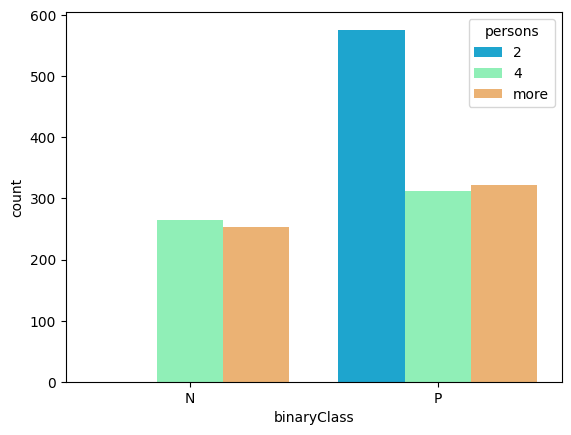

In [ ]:
sns.countplot(x=car_data.binaryClass,hue='persons',data=car_data,palette='rainbow')

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('traning data is: {}\n testing data is: {}'.format(len(car_data),len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape


traning data is: 1728
 testing data is: 1209


((1728, 7), (1209, 7), (519, 7))

In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [ ]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [ ]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [ ]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


In [ ]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
big,411
med,405
small,393


In [ ]:
train_data['safety'].value_counts()

,count
safety,
med,406
low,402
high,401


In [ ]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,849
N,360


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1209 entries, 1005 to 1379
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   buying       1209 non-null   category
 1   maint        1209 non-null   category
 2   doors        1209 non-null   category
 3   persons      1209 non-null   category
 4   lug_boot     1209 non-null   category
 5   safety       1209 non-null   category
 6   binaryClass  1209 non-null   category
dtypes: category(7)
memory usage: 18.8 KB


In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree
text_representation=tree.export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)

|--- persons <= 0.50
|   |--- class: 1
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- maint >  2.50
|   |   |   |   |--- buying <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- buying >  0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- persons >  1.50
|  

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds=tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared,preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")


Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

Confusion Matrix:[[360   0]
 [  0 849]]
